In [1]:
# read in some helpful libraries
import nltk # the natural langauage toolkit, open-source NLP
import pandas as pd # dataframes
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from collections import Counter

# initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

### Read our train data into a dataframe
texts = pd.read_csv("raw_data/train_full.csv", encoding = 'latin-1')

In [2]:
# split the data by author
byAuthor = texts.groupby("author")

# how many sentences are from each author?
for name, group in byAuthor:
        print(len(group['text']))

7900
5635
6044


In [3]:
# create df for each author
eap = texts.loc[texts['author'] == 'EAP']
hpl = texts.loc[texts['author'] == 'HPL']
mws = texts.loc[texts['author'] == 'MWS']

# randomly subset the larger author dfs so that each df has the same number of sentences
eap_s = eap.sample(n=5635)
mws_s = mws.sample(n=5635)

# combine subsetted dfs into single df
texts_s = pd.concat([eap_s, hpl, mws_s])

In [4]:
# split the data by author
byAuthor = texts_s.groupby("author")

# create empty dictionary to store combined sentences for each author
sentence_dict = {}

# create empty dictionary to store tokenized sentences for each author
token_dict = {}

# for each author...
for name, group in byAuthor:
    # get all of the sentences they wrote and collapse them into a
    # single long string
    sentences = group['text'].str.cat(sep = ' ')
    
    # convert everything to lower case (so "The" and "the" get counted as 
    # the same word rather than two different words)
    sentences = sentences.lower()
    
    sentence_dict[name] = (sentences)
    
    # split the text into individual tokens (words)  
    tokens = nltk.tokenize.word_tokenize(sentences)
    
    token_dict[name] = (tokens)

In [12]:
# create copy of texts df to modify
texts_voc = texts

# create column to populate with the unique words used in each sentence
texts_voc['sentence_len'] = [len(str.split(s)) for s in texts['text']]

# create column to populate with the unique words used in each sentence
texts_voc['vocab'] = [len(set(str.split(s))) for s in texts['text']]

texts_voc.head()


,id,text,author,sentence_len,vocab
0,id26305,"This process, however, afforded me no means of...",EAP,41,35
1,id17569,It never once occurred to me that the fumbling...,HPL,14,14
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,36,32
3,id27763,How lovely is spring As we looked from Windsor...,MWS,34,32
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,27,25


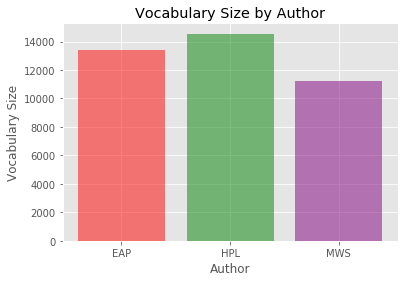

In [6]:
# plot total vocab
plt.bar(np.arange(3), vocabulary.values(), color = ['red', 'green', 'purple'], alpha = 0.5)
plt.xticks(np.arange(3), vocabulary.keys())
plt.title("Vocabulary Size by Author")
plt.xlabel("Author")
plt.ylabel("Vocabulary Size")
plt.show()

In [17]:
sentence_summary = pd.DataFrame(texts_voc.groupby('author')['vocab'].describe())
sentence_summary

,count,mean,std,min,25%,50%,75%,max
author,,,,,,,,
EAP,7900.0,21.894937,13.727397,2.0,12.0,19.0,29.0,155.0
HPL,5635.0,24.438332,11.053564,3.0,17.0,23.0,30.0,102.0
MWS,6044.0,23.544672,14.925835,2.0,14.0,21.0,30.0,429.0


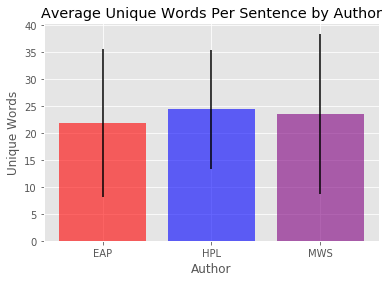

In [18]:
# plot avg vocab
plt.bar(np.arange(3), sentence_summary['mean'], yerr=sentence_summary['std'], color = ['red', 'blue', 'purple'], alpha = 0.6)
plt.xticks(np.arange(3), sentence_summary.index)
plt.title("Average Unique Words Per Sentence by Author")
plt.xlabel("Author")
plt.ylabel("Unique Words")
plt.show()

In [22]:
grps = pd.unique(texts.author.values)
d_data = {grp:texts['vocab'][texts.author == grp] for grp in grps}

{'EAP': 0        35
 2        32
 6        21
 7         8
 8        62
 11       10
 14       10
 16       49
 18       40
 20       20
 22       15
 23       61
 24       11
 25       21
 26       68
 27       24
 30        9
 39       39
 44       24
 45       16
 49       40
 50       15
 51       14
 57       22
 62       15
 65       34
 68       27
 69       31
 71       27
 72       38
          ..
 19524     8
 19527    30
 19528    20
 19529     4
 19531     7
 19532    23
 19533    69
 19534    13
 19535    10
 19541    17
 19545     8
 19550    12
 19551    29
 19552    16
 19553    23
 19555    21
 19556    39
 19557     9
 19558    30
 19560    16
 19562    16
 19564    21
 19565    23
 19567     9
 19568    40
 19572    39
 19574    19
 19575    10
 19576    13
 19577    14
 Name: vocab, Length: 7900, dtype: int64, 'HPL': 1        14
 4        25
 12       14
 13       15
 19       42
 21       39
 28       40
 29       25
 33        7
 34       17
 35       16
 36      

In [25]:
from scipy import stats
 
F, p = stats.f_oneway(d_data['EAP'], d_data['HPL'], d_data['MWS'])

print(F)
print(p)

63.161650934
4.54328013189e-28
